In [88]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical

In [89]:
df = ImageDataGenerator(rescale = 0.1/255)

In [90]:
#Load the train data
train = df.flow_from_directory('D://M_AI//Deep Learning//Datasets//data//train',class_mode='binary')

Found 40 images belonging to 2 classes.


In [91]:
#Load the test data
test = df.flow_from_directory('D://M_AI//Deep Learning//Datasets//data//test',class_mode='binary')

Found 20 images belonging to 2 classes.


In [92]:
#Build CNN Model

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(32,kernel_size=(5,5), activation='relu',input_shape=(256,256,3)))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(64,kernel_size=(5,5), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))



In [93]:
# Add the optimizer
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.01)

In [94]:
#Compile 
model.compile(optimizer=sgd_optimizer,loss='binary_crossentropy',  metrics=['accuracy'])


In [95]:
#Fit the train and test data to model and specify the iterations
model.fit(train,validation_data=test, epochs=100)

Epoch 1/100
2/2 [==============================] - 3s 966ms/step - loss: 0.7290 - accuracy: 0.4833 - val_loss: 0.6967 - val_accuracy: 0.5000
Epoch 2/100
2/2 [==============================] - 3s 2s/step - loss: 1.3396 - accuracy: 0.5083 - val_loss: 0.6931 - val_accuracy: 0.5500
Epoch 3/100
2/2 [==============================] - 3s 2s/step - loss: 0.6869 - accuracy: 0.5583 - val_loss: 0.6930 - val_accuracy: 0.6000
Epoch 4/100
2/2 [==============================] - 3s 772ms/step - loss: 0.6784 - accuracy: 0.5542 - val_loss: 0.6931 - val_accuracy: 0.5500
Epoch 5/100
2/2 [==============================] - 3s 772ms/step - loss: 0.6723 - accuracy: 0.5062 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 6/100
2/2 [==============================] - 3s 2s/step - loss: 0.6444 - accuracy: 0.5417 - val_loss: 0.6928 - val_accuracy: 0.6000
Epoch 7/100
2/2 [==============================] - 3s 2s/step - loss: 0.6385 - accuracy: 0.6417 - val_loss: 0.6929 - val_accuracy: 0.5500
Epoch 8/100
2/2 [========

2/2 [==============================] - 3s 804ms/step - loss: 0.0077 - accuracy: 1.0000 - val_loss: 0.6842 - val_accuracy: 0.6000
Epoch 60/100
2/2 [==============================] - 3s 2s/step - loss: 0.0122 - accuracy: 1.0000 - val_loss: 0.6827 - val_accuracy: 0.6000
Epoch 61/100
2/2 [==============================] - 3s 772ms/step - loss: 0.0074 - accuracy: 1.0000 - val_loss: 0.6824 - val_accuracy: 0.6000
Epoch 62/100
2/2 [==============================] - 3s 784ms/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.6811 - val_accuracy: 0.6000
Epoch 63/100
2/2 [==============================] - 3s 2s/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 0.6818 - val_accuracy: 0.6000
Epoch 64/100
2/2 [==============================] - 3s 779ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.6821 - val_accuracy: 0.6000
Epoch 65/100
2/2 [==============================] - 3s 2s/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.6821 - val_accuracy: 0.6000
Epoch 66/100
2/2 [==========

In [97]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_6 (Batch (None, None, None, 3)     12        
_________________________________________________________________
conv2d_22 (Conv2D)           (None, None, None, 32)    2432      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, None, None, 32)    0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, None, None, 64)    51264     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, None, None, 64)    0         
_________________________________________________________________
dropout_10 (Dropout)         (None, None, None, 64)    0         
_________________________________________________________________
flatten_10 (Flatten)         (None, None)            

In [99]:
#Listing the variables in the history
print(model.history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


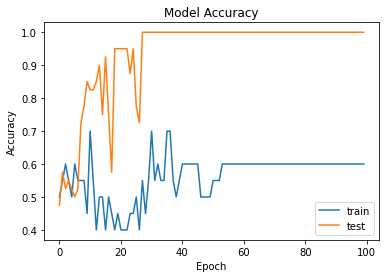

In [101]:
#Summarizing the Accuracy
import matplotlib.pyplot as plt

plt.plot(model.history.history['val_accuracy'])
plt.plot(model.history.history['accuracy'])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['train','test'])
plt.show()

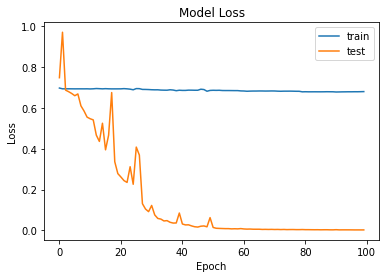

In [102]:
#Summarizing the Loss
plt.plot(model.history.history['val_loss'])
plt.plot(model.history.history['loss'])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['train','test'])
plt.show()